In [1]:
import torch
import numpy as np

# Implement matmul

## Using standard Python array

In [2]:
a = [
    [1, 2],
    [3, 4]
]; a

[[1, 2], [3, 4]]

In [3]:
b = [
    [2, 3, 4],
    [2, 3, 4]
]; b

[[2, 3, 4], [2, 3, 4]]

Do it for one element

In [4]:
i = 0
j = 0

a_row = a[i]
b_col = [elem[j] for elem in b]

if len(a_row) != len(b_col): raise Exception("x's number of columns must equal y's numbe of rows")
    
sum = 0
for k in range(len(a_row)):
    sum += a_row[k]*b_col[k]
sum

6

Make it a loop

In [5]:
from pdb import set_trace

In [8]:
new_mat = []
for i, a_row in enumerate(a):
    new_row = []
    for j in range(len(b[0])):
        b_col = [elem[j] for elem in b]
        
        if len(a_row) != len(b_col): raise Exception("x's number of columns must equal y's numbe of rows")
        
        sum = 0
        for k in range(len(a_row)):
            sum += a_row[k]*b_col[k]
        new_row.append(sum)
    new_mat.append(new_row)
new_mat

[[6, 9, 12], [14, 21, 28]]

In [11]:
true_res = [
    [6, 9, 12],
    [14, 21, 28]
]

assert true_res == new_mat

In [13]:
def matmul(a, b):
    new_mat = []
    for i, a_row in enumerate(a):
        new_row = []
        for j in range(len(b[0])):
            b_col = [elem[j] for elem in b]

            if len(a_row) != len(b_col): raise Exception("x's number of columns must equal y's numbe of rows")

            sum = 0
            for k in range(len(a_row)):
                sum += a_row[k]*b_col[k]
            new_row.append(sum)
        new_mat.append(new_row)
    return new_mat

assert true_res == matmul(a, b)

### Reshape array

In [119]:
from matplotlib import pyplot as plt

In [120]:
inp = [1, 2, 3, 4, 5, 6]

size_x = 6
size_y = 1
result = []
for x in range(size_x):
    row = []
    for y in range(size_y):
        row.append(inp[x*size_y + y])
    result.append(row)
result

[[1], [2], [3], [4], [5], [6]]

In [121]:
inp = [1, 2, 3, 4, 5, 6]

size_z, size_x, size_y = [1, 1, 6]
result = []
for z in range(size_z):
    mat = []
    for x in range(size_x):
        row = []
        for y in range(size_y):
            row.append(inp[z*size_x + x*size_y + y])
        mat.append(row)
    result.append(mat)
result

[[[1, 2, 3, 4, 5, 6]]]

In [122]:
def reshape(inp, sizes):
    result = []
    for z in range(sizes[0]):
        mat = []
        for x in range(sizes[1]):
            row = []
            for y in range(sizes[2]):
                row.append(inp[z*sizes[1] + x*sizes[2] + y])
            mat.append(row)
        result.append(mat)
    return result

reshape(inp, (1, 2, 3))

[[[1, 2, 3], [4, 5, 6]]]

### Generate random numbers and test

In [204]:
random.seed(1)

x = [10, 20, 30]

types = [
    ('random', None), ('uniform', (0,1)), ('triangular', None),
    ('betavariate', (2, 4)),
    ('gammavariate', (1, 2)),
    ('gauss', (0, 1)),
    ('lognormvariate', (0, 1)),
    ('normalvariate', (0, 1)),
    ('vonmisesvariate', (0, 1)),
    ('weibullvariate', (1, 1)),
]

In [205]:
chart_dims = (5, 2)
reshaped_types = reshape(types, (1,) + chart_dims)
reshaped_types

[[[('random', None), ('uniform', (0, 1))],
  [('triangular', None), ('betavariate', (2, 4))],
  [('gammavariate', (1, 2)), ('gauss', (0, 1))],
  [('lognormvariate', (0, 1)), ('normalvariate', (0, 1))],
  [('vonmisesvariate', (0, 1)), ('weibullvariate', (1, 1))]]]

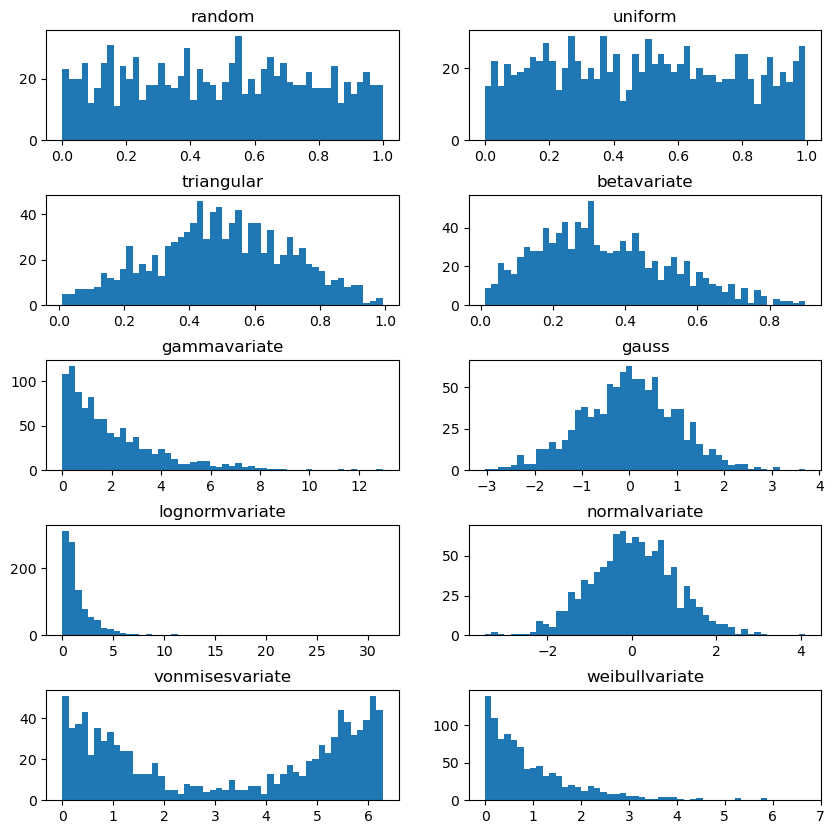

In [207]:
fig, ax = plt.subplots(*chart_dims, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for i in range(chart_dims[0]):
    for j in range(chart_dims[1]):
        rtype, args = reshaped_types[0][i][j]
        mapper = lambda _: getattr(random, rtype)() if args is None else getattr(random, rtype)(*args)
        result = list(map(mapper, [_ for _ in range(1000)]))

        ax[i][j].hist(result, bins=50)
        ax[i][j].set_title(rtype)

### Performance testing

In [219]:
def gen_random_array(size, fn='random', *args):
    mapper = lambda _: getattr(random, fn)() if args is None else getattr(random, fn)(*args)
    return list(map(mapper, [_ for _ in range(size)]))

gen_random_array(5)

[0.5966449558277764,
 0.9044182783363252,
 0.3492288400688991,
 0.7899550253074651,
 0.19103120689201092]

In [229]:
a = reshape(gen_random_array(600), (1, 20, 30))[0]
b = reshape(gen_random_array(1200), (1, 30, 40))[0]

%timeit -n 100 c = matmul(a, b)

1.68 ms ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
